# Section 5 : Multispectral Remote Sensing Data in Python
## Chapter 11 : Vegetation Indices

[![Foo](https://www.colorado.edu/brand/sites/default/files/styles/medium/public/page/boulder-one-line_0.png)](https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/)

Les techniques et considérations de ce notebook se dirigent plus vers l'objectif final du répertoire [Index3](https://github.com/vintel38/Index3). En effet, il est question d'indices végétals qui peuvent efficacement décrire la qualité et la santé de la végétation sur une image de télédétection. En liant des concepts de biologie et de physique générale, on s'aperçoit qu'une végétation en bonne santé réfléchit beaucoup plus de rayonnement dans le proche infrarouge (NIR) alors que le visible est absorbé par la matière végétale. Ainsi, si on définit des valeurs adimensionnées concernant la part de rayonnement capté par l'observateur qui enregistre la séquence, on peut alors déduire des informations sur la présence de végétation, et si elle est avérée, caractériser la santé de la végétation tout ça à partir d'un cliché de télédétection multispectral. 

## NDVI - Normalized Differential Vegetation Index 

Le premier indicateur que l'on peut mettre à jour est le NDVI. Une végétation en bonne santé rayonne beaucoup dans l'infrarouge proche (NIR) et peu dans le visible. A noter que cet écart est moindre quand la végétation est en mauvaise santé. De fait, on a un critère pour décrire l'état de santé de la plante. On s'intéresse à la différence entre le rayonnement capté dans le NIR et celui capté dans le visible. On normalise ensuite la différence par la somme pour obtenir un nombre adimensionné:

$$
NDVI = \frac{\Psi_{NIR}-\Psi_{Red}}{\Psi_{NIR}+\Psi_{Red}}
$$ 

avec $\Psi$ étant la réflectance reçue par l'observateur pour chaque pixel. Note: en réalité, le terme réflectance fait référence au nombre adimensionnel qui évalue la quantité d'énergie radiative (ou flux lumineux) réfléchie par une surface divisée par la quantité d'énergie radiative incidente. On utilise la notation du document d'origine et on supposera dans la suite que $\Psi$ représente le flux lumineux réfléchi pour pouvoir utiliser facilement les clichés sur les différentes bandes spectrales. 

Dans ce notebook, nous utiliserons donc l'indicateur NDVI pour caractériser la distribution de végétation sur des images de télédétection. Cet indicateur varie entre 0 et 1 où 0 représente une végétation flétrie et 1 une végétation luxuriante. 

In [18]:
import os

import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# Download data and set working directory
data = et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))


***
On commence par l'exemple du notebook qui est une image délivrée par le NAIP pour *National Agriculture Imagery Program*, une agence fédérale américaine qui prend des clifchés aériens de zones agricoles pour générer des donneés à compiler sur les capacités de production agricoles américaines. Le fichier `.tif` à extraire contient toutes les bandes spectrales du cliché aérien. On utilise donc la fonction `rioxarray.open_rasterio()` pour importer le cliché NAIP. Les données extraites sont un tableau à 4 dimensions qui correspondent au rouge, vert, bleu, infrarouge proche sans que les plages spectrales ne soient renseignées sur le site du notebook. 

In [17]:
naip_data_path = os.path.join("cold-springs-fire",
                              "naip",
                              "m_3910505_nw_13_1_20150919",
                              "crop",
                              "m_3910505_nw_13_1_20150919_crop.tif")

naip_data = rxr.open_rasterio(naip_data_path)

# View shape of the data
naip_data.shape

(4, 2312, 4377)

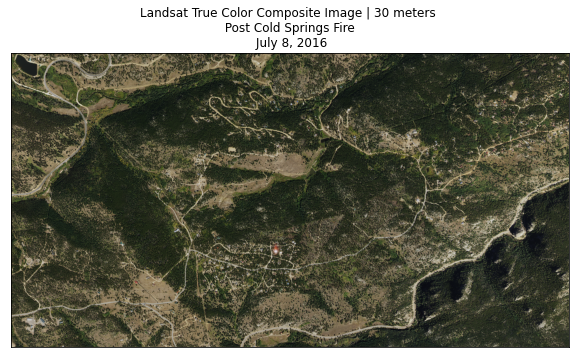

In [35]:
ep.plot_rgb(naip_data.values,
            rgb=[0, 1, 2],
            title="Landsat True Color Composite Image | 30 meters \n Post Cold Springs Fire \n July 8, 2016")

plt.show()

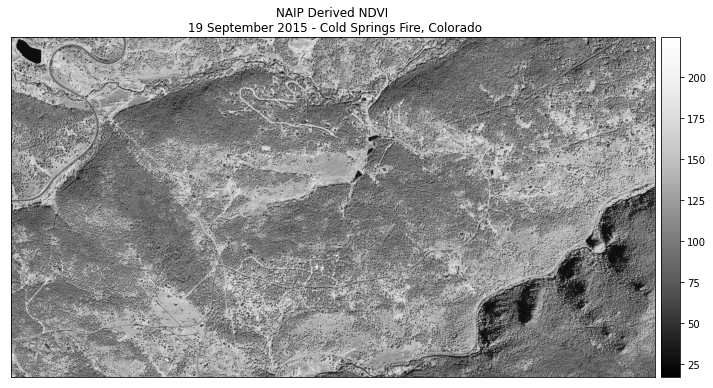

In [41]:
ep.plot_bands(naip_data[3],
              #cmap='PiYG',
              #scale=False,
              #vmin=-1, vmax=1,
              title="NAIP Derived NDVI\n 19 September 2015 - Cold Springs Fire, Colorado")
plt.show()

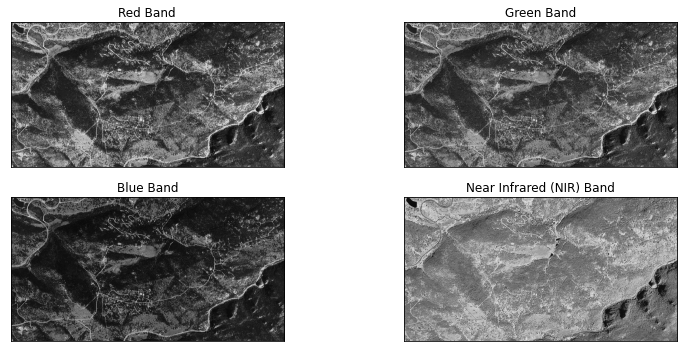

In [37]:
titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band"]

# Plot all bands using the earthpy function
ep.plot_bands(naip_data, 
              figsize=(12, 5), 
              cols=2,
              title=titles,
              cbar=False)
plt.show()


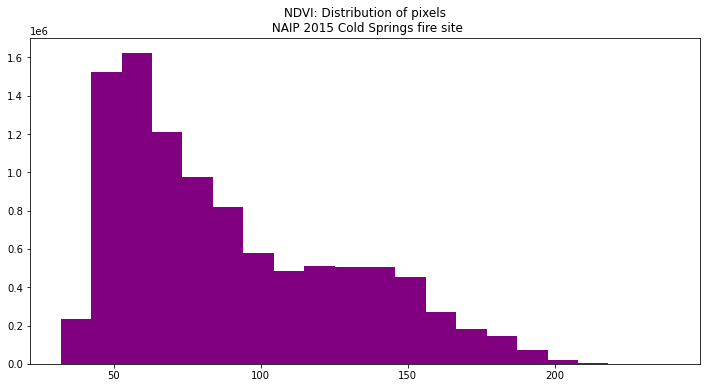

In [51]:
# Histo sur red 

ep.hist(naip_data[0].values,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site"])

plt.show()

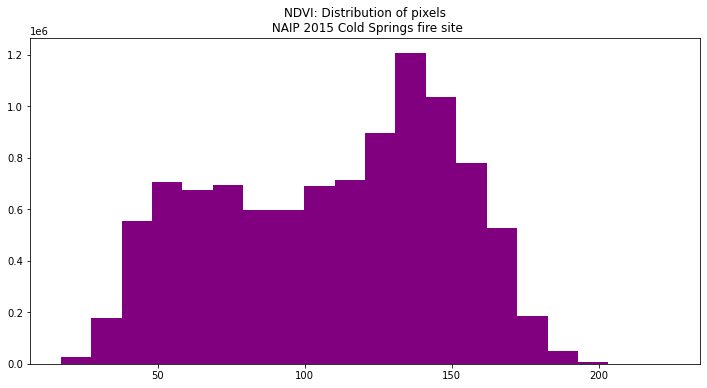

In [52]:
# Histo sur NIR

ep.hist(naip_data[3].values,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site"])

plt.show()

***
La fonction préimplémentée `earthpy.spatial.normalized_diff()` permet de réaliser simplement le calcul de l'indicateur NDVI entre la dernière et la première bande spectrale sur l'entièreté de l'image aérienne. Enfin, l'image résultante est affichée classiquement avec la fonction `earthpy.plot.plot_bands()` en utilisant la cartographie de couleurs *PiYG* pour facilement identifier les zones avec des valeurs extrémales. La plage de valeurs de NDVI est aussi normalisée entre -1 et 1 pour plus de lisibilité. On peut voir sur l'affichage que la mojorité des pixels ont une valeur correspondante proche de 0.00 et peu de pixels ont une valeur qui tend nettement vers les extrémaux ce qui peut indiquer que les plages spectrales de l'observation sont étroites avec peu de rayonnement capté.

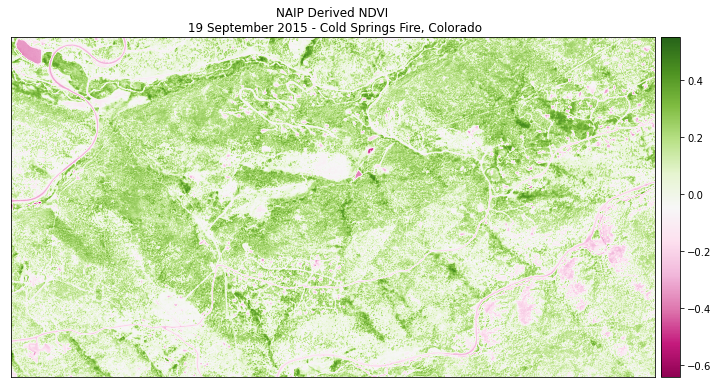

In [65]:
naip_ndvi = es.normalized_diff(naip_data[3], naip_data[0])

ep.plot_bands(naip_ndvi,
              cmap='PiYG',
              scale=False,
              #vmin=-1, vmax=1,
              title="NAIP Derived NDVI\n 19 September 2015 - Cold Springs Fire, Colorado")
plt.show()

In [68]:
np.min(naip_ndvi)

<xarray.DataArray ()>
array(-0.64238411)
Coordinates:
    spatial_ref  int64 0

In [71]:
np.count_nonzero(naip_ndvi<-0.4)

1840

In [72]:
np.count_nonzero(naip_ndvi>0.5)

240

VALEURS MAX DANS LA VISUALISATION FAUSSENT LA CARTOGRAPHIE ET LA NORMALISATION RESULTE DANS UNE MAP BLANCHIE POUR NORMALISER SUR UNE TRES GRANDE PLAGE ALORS QUE LES PIXELS SONT MAJORITAIREMENT DISTRIBUES SUR UNE PLUS PETITE PLAGE. 

HISTOGRAMME EXPOSANT 1E6 : SI UN SEUL PIXEL COMME AU CENTRE DE LA MAP AVEC VALEUR PROCHE DE 0, PEUT DESEQUILIBRER TOUTE LA NORMALISATION 


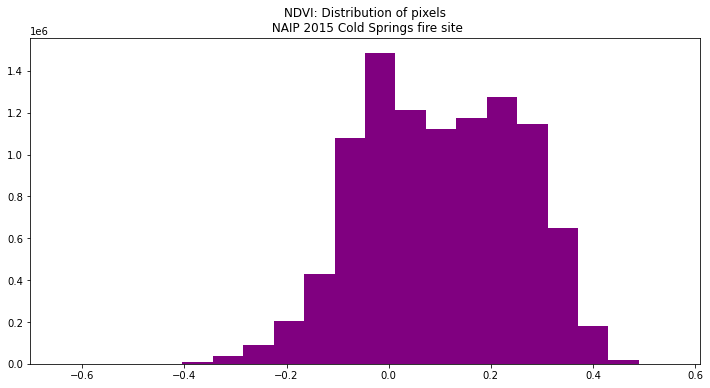

In [66]:
ep.hist(naip_ndvi.values,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site"])

plt.show()

In [8]:
np.average(naip_ndvi)

0.10109140664105948

In [6]:
type(naip_ndvi), naip_ndvi.dtype

(xarray.core.dataarray.DataArray, dtype('float64'))

In [7]:
naip_ndvi_outpath = os.path.join("cold-springs-fire",
                                 "outputs",
                                 "naip_ndvi.tif")

# Write your the ndvi raster object
naip_ndvi.rio.to_raster(naip_ndvi_outpath)

# Cold Springs - 2016 - origins pictures

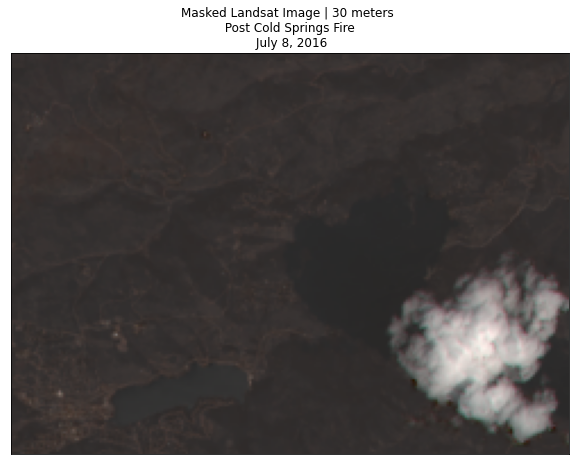

In [22]:
#Custom function to read in list of tifs into an xarray object
def combine_tifs(tif_list):
    out_xr=[]
    for i, tif_path in enumerate(tif_list):
        out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
        out_xr[i]["band"]=i+1
     
    return xr.concat(out_xr, dim="band") 

# Stack the Landsat pre fire data
landsat_paths_pre_path = os.path.join("cold-springs-fire", 
                                      "landsat_collect",
                                      "LC080340322016070701T1-SC20180214145604", 
                                      "crop",
                                      "*band*.tif")

landsat_paths_pre = glob(landsat_paths_pre_path)
landsat_paths_pre.sort()

landsat_pre_cloud = combine_tifs(landsat_paths_pre)

ep.plot_rgb(landsat_pre_cloud.values,
            rgb=[2, 1, 0],
            title="Masked Landsat Image | 30 meters \n Post Cold Springs Fire \n July 8, 2016")
plt.show()


In [46]:
naip_ndvi2 = es.normalized_diff(landsat_pre_cloud[4], landsat_pre_cloud[3])

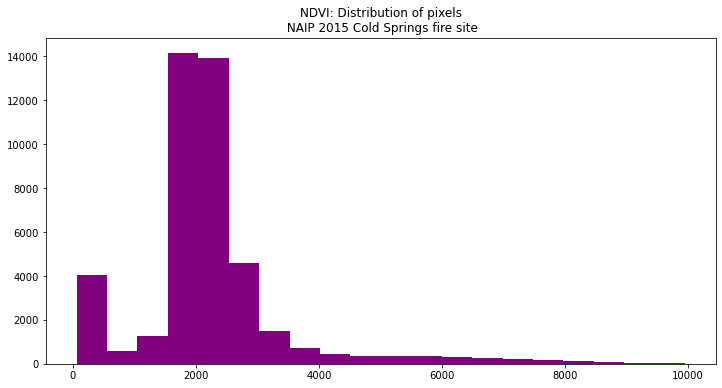

In [54]:
# Histo sur NIR

ep.hist(landsat_pre_cloud[4].values,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site"])

plt.show()

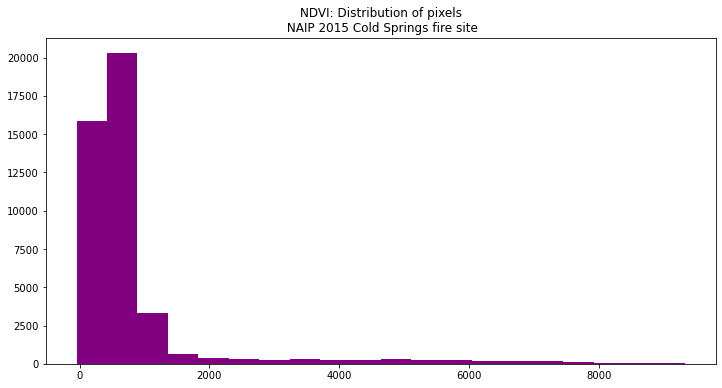

In [53]:
# Histo sur red 

ep.hist(landsat_pre_cloud[3].values,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site"])

plt.show()

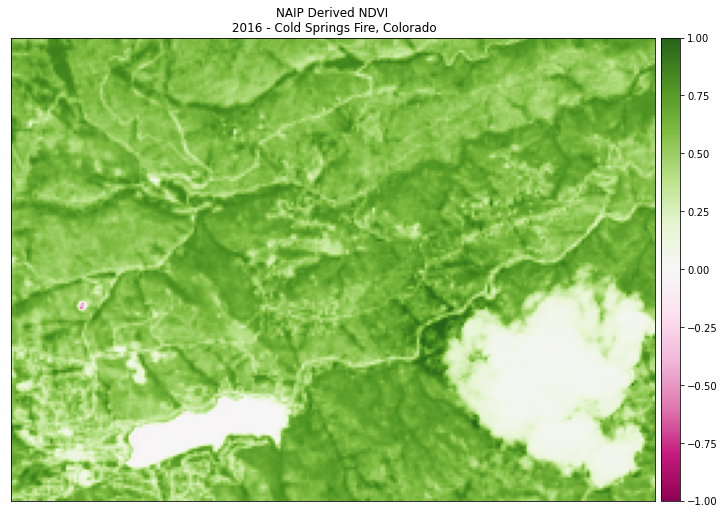

In [47]:
ep.plot_bands(naip_ndvi2,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="NAIP Derived NDVI\n 2016 - Cold Springs Fire, Colorado")
plt.show()

In [48]:
np.average(naip_ndvi2)

0.546073855193897

In [49]:
np.count_nonzero(~np.isnan(naip_ndvi2))

43542

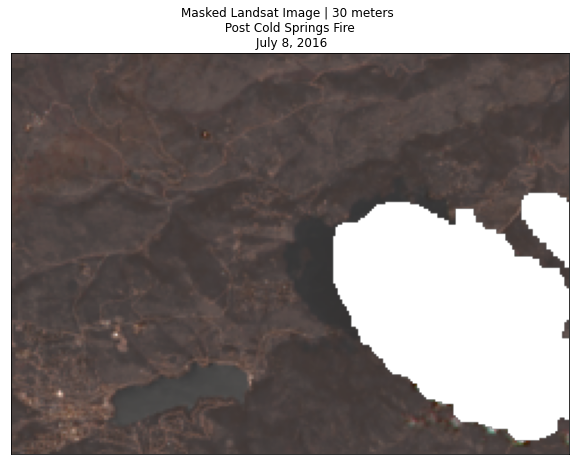

In [30]:

# Calculate bounds object
landsat_pre_cloud_ext_bds = landsat_pre_cloud.rio.bounds()

# Open the pixel_qa layer for your landsat scene
landsat_pre_cl_path = os.path.join("cold-springs-fire", 
                                   "landsat_collect",
                                   "LC080340322016070701T1-SC20180214145604", 
                                   "crop",
                                   "LC08_L1TP_034032_20160707_20170221_01_T1_pixel_qa_crop.tif")

landsat_qa = rxr.open_rasterio(landsat_pre_cl_path).squeeze()

# Generate array of all possible cloud / shadow values
cloud_shadow = [328, 392, 840, 904, 1350]
cloud = [352, 368, 416, 432, 480, 864, 880, 928, 944, 992]
high_confidence_cloud = [480, 992]

vals_to_mask = cloud_shadow + cloud + high_confidence_cloud

# Call the earthpy mask function using pixel QA layer
landsat_pre_cloud_masked = landsat_pre_cloud.where(~landsat_qa.isin(vals_to_mask))

# Masking out NA values with numpy in order to plot with ep.plot_rgb
landsat_pre_cloud_masked_plot = ma.masked_array(landsat_pre_cloud_masked.values, landsat_pre_cloud_masked.isnull())

ep.plot_rgb(landsat_pre_cloud_masked_plot,
            rgb=[2, 1, 0],
            title="Masked Landsat Image | 30 meters \n Post Cold Springs Fire \n July 8, 2016")
plt.show()


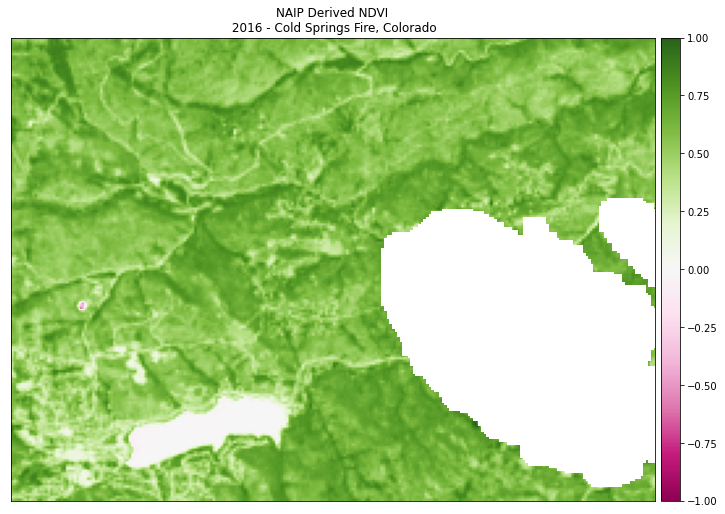

In [31]:
CS_ndvi = es.normalized_diff(landsat_pre_cloud_masked_plot[4], landsat_pre_cloud_masked_plot[3])

ep.plot_bands(CS_ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="NAIP Derived NDVI\n 2016 - Cold Springs Fire, Colorado")
plt.show()

In [32]:
np.average(CS_ndvi)

0.5809856874450827

In [45]:
np.count_nonzero(~np.isnan(CS_ndvi))

35394

prend une partie de la végétation sous l'ombre portée du nuage donc ca compense la disparition des pixels blancs du nuage et la moyenne reste faible 

De plus zone dans l'ombre portée du nuage plus verte que le reste donc soit est très végétalisée soit la mesure est modifiée par la réflection de la lumière solaire sur la végétation. 